In [2]:
# loading libraries
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 

E:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# importint data
filename = "E:/PROGRAM/ML/ML_Projects/lung-cancer.data.txt"

names = []
for i in range(0,56):
    data_names = 'data_' + str(i)
    names.append(data_names)

cancer_data = pd.read_csv(filename, delimiter=',', header=None, index_col=False, names=names)

In [4]:
# showing first five samples of each feature
cancer_data.head()

,data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,...,data_46,data_47,data_48,data_49,data_50,data_51,data_52,data_53,data_54,data_55
0,1,0,3,0,?,0,2,2,2,1,...,2,2,2,2,2,2,1,1,1,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,2,1,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,2,1
3,1,0,2,3,2,1,3,3,3,1,...,1,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,2,1,2


In [5]:
# showing last five samples of each feature
cancer_data.tail()

,data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,...,data_46,data_47,data_48,data_49,data_50,data_51,data_52,data_53,data_54,data_55
27,3,0,2,2,1,0,2,2,2,1,...,3,3,3,2,2,3,2,2,2,2
28,3,0,3,2,2,0,2,2,2,1,...,2,2,2,2,3,1,2,2,2,2
29,3,0,2,1,1,0,2,2,1,1,...,2,2,2,3,2,2,2,2,2,2
30,3,0,2,3,2,1,2,2,3,1,...,2,2,2,2,2,2,2,2,1,2
31,3,0,2,3,1,0,2,3,3,1,...,2,2,2,2,2,2,2,2,2,2


In [6]:
# summary of data type available
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 56 columns):
data_0     32 non-null int64
data_1     32 non-null int64
data_2     32 non-null int64
data_3     32 non-null int64
data_4     32 non-null object
data_5     32 non-null int64
data_6     32 non-null int64
data_7     32 non-null int64
data_8     32 non-null int64
data_9     32 non-null int64
data_10    32 non-null int64
data_11    32 non-null int64
data_12    32 non-null int64
data_13    32 non-null int64
data_14    32 non-null int64
data_15    32 non-null int64
data_16    32 non-null int64
data_17    32 non-null int64
data_18    32 non-null int64
data_19    32 non-null int64
data_20    32 non-null int64
data_21    32 non-null int64
data_22    32 non-null int64
data_23    32 non-null int64
data_24    32 non-null int64
data_25    32 non-null int64
data_26    32 non-null int64
data_27    32 non-null int64
data_28    32 non-null int64
data_29    32 non-null int64
data_30    32 non-null int

In [7]:
# quick view of missing values in data_4
cancer_data["data_4"].value_counts()

1    15
2    12
?     4
0     1
Name: data_4, dtype: int64

In [8]:
# quick view of missing values in data_38
cancer_data["data_38"].value_counts()

2    18
1    11
3     2
?     1
Name: data_38, dtype: int64

In [10]:
# data dimension
cancer_data.shape

(32, 56)

In [9]:
# filling missing values with mean in data_4
cancer_data['data_4'] = cancer_data['data_4'].replace({'?':np.nan}).astype(float)
cancer_data['data_4'] = cancer_data['data_4'].fillna(value=cancer_data['data_4'].mean())

In [11]:
# filling missing value with mean in data_38
cancer_data['data_38'] = cancer_data['data_38'].replace({'?':np.nan}).astype(float)
cancer_data['data_38'] = cancer_data['data_38'].fillna(value=cancer_data['data_38'].mean())

In [12]:
# checking updated data_4 and data_38
print(cancer_data["data_4"].value_counts())
print(cancer_data["data_38"].value_counts())

1.000000    15
2.000000    12
1.392857     4
0.000000     1
Name: data_4, dtype: int64
2.000000    18
1.000000    11
3.000000     2
1.709677     1
Name: data_38, dtype: int64


In [13]:
# descriptive view of data
cancer_data.describe()

,data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,...,data_46,data_47,data_48,data_49,data_50,data_51,data_52,data_53,data_54,data_55
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.031250,0.031250,2.375000,2.031250,1.392857,0.281250,2.187500,2.125000,2.406250,1.156250,...,1.937500,2.062500,2.062500,2.000000,2.000000,2.000000,1.843750,1.843750,1.562500,1.812500
std,0.782237,0.176777,0.553581,1.031265,0.529107,0.456803,0.737804,0.751343,0.756024,0.514899,...,0.435335,0.245935,0.245935,0.359211,0.359211,0.508001,0.447889,0.447889,0.504016,0.396558
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,1.750000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,2.000000,0.000000,2.000000,2.000000,1.196429,0.000000,2.000000,2.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,0.000000,3.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000


In [14]:
# class distribution for label
cancer_data.groupby('data_0').size()

data_0
1     9
2    13
3    10
dtype: int64

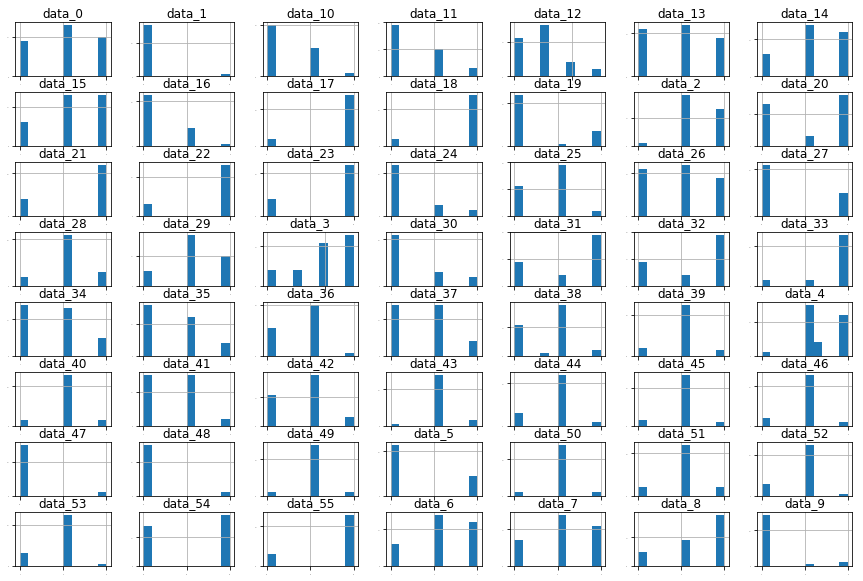

In [15]:
cancer_data.hist(sharex=False, sharey=False,
                 xlabelsize=1, ylabelsize=1, figsize=(15,10))
plt.show()

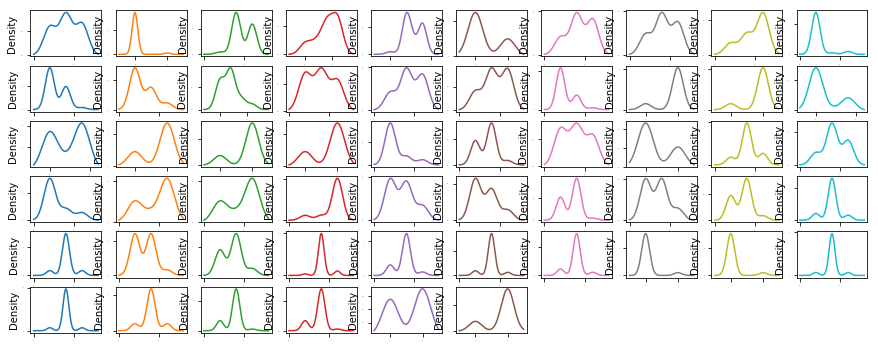

In [16]:
cancer_data.plot(kind='density', subplots=True, layout=(10,10),
           sharex=False, legend=False, fontsize=1, figsize=(15,10))
plt.show()

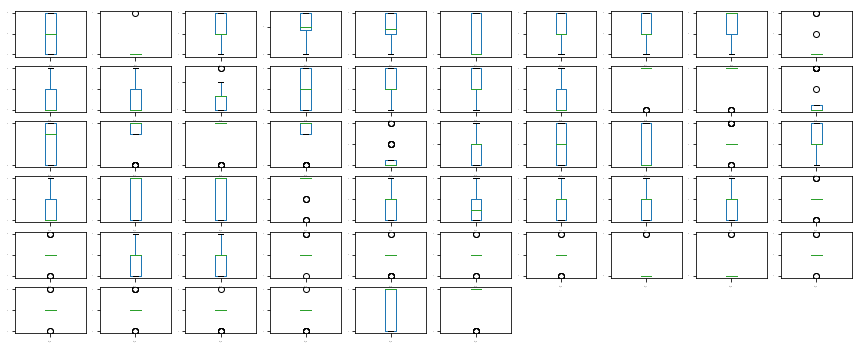

In [17]:
cancer_data.plot(kind='box', subplots=True, layout=(10,10), 
           sharex=False, legend=False, fontsize=1, figsize=(15,10))
plt.show()

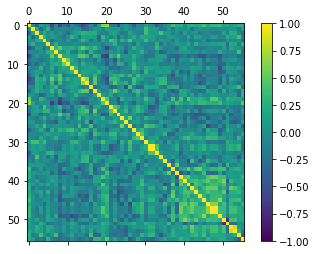

           data_0        data_1    data_2        data_3        data_4  \
data_0   1.000000 -7.289954e-03 -0.400403  1.587023e-01  1.670128e-02   
data_1  -0.007290  1.000000e+00  0.206021 -3.594233e-01 -1.914477e-17   
data_2  -0.400403  2.060214e-01  1.000000 -2.118938e-02  2.281309e-01   
data_3   0.158702 -3.594233e-01 -0.021189  1.000000e+00  2.639226e-01   
data_4   0.016701 -1.914477e-17  0.228131  2.639226e-01  1.000000e+00   
data_5   0.064886  2.871189e-01 -0.047836 -1.925888e-02  3.336612e-02   
data_6  -0.513519 -2.937013e-01  0.138215  7.684310e-02 -2.774111e-01   
data_7  -0.061747 -3.035884e-02 -0.116335  3.642821e-02 -6.375606e-02   
data_8  -0.567621 -9.805528e-02  0.086711 -9.955727e-02 -2.592053e-02   
data_9  -0.252784 -5.537469e-02 -0.099025 -2.524920e-01 -1.395497e-01   
data_10 -0.398173 -1.323983e-01 -0.299206 -2.269535e-02  7.388670e-02   
data_11  0.030682 -1.357688e-01  0.000000  3.025507e-01 -1.166424e-01   
data_12 -0.188169  1.998358e-02  0.144645  7.650351

In [18]:
# checking for correlated fetures
fig = plt.figure()
ax = fig.add_subplot(111)
c_ax = ax.matshow(cancer_data.corr(), vmin=-1, vmax=1,
                  interpolation='none') 
fig.colorbar(c_ax)
plt.show()

print(cancer_data.corr())

In [19]:
# quick view of data_1
cancer_data['data_1'].value_counts()

0    31
1     1
Name: data_1, dtype: int64

In [20]:
# dropping data_1
cancer_data.drop(['data_1'], axis=1, inplace=True)

In [21]:
# separating features and label
features = cancer_data.drop(['data_0'], axis=1)
target = cancer_data['data_0']

X = np.array(features)
y = np.array(target)

In [22]:
# checking features and label dimensions
print(X.shape)
print(y.shape)

(32, 54)
(32,)


In [23]:
# splitting into train and test set
test_size = 0.2 
seed = 42
X_train, X_test, y_train,  y_test = train_test_split (X, y, 
                                                      test_size=test_size,
                                                      random_state=seed)

In [24]:
# applying log transform to features
X_train_log = np.log(X_train + 1) 
X_test_log = np.log(X_test + 1)

In [25]:
# model selection
models = []
models.append(('SVC', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DCT', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
names = []
for name, model in models: 
    print (name)
    clf = model 
    clf.fit(X_train_log, y_train)
    kfold = KFold(n_splits=10, shuffle=True, random_state=0)
    scores = cross_val_score(clf, X_train_log, y_train, cv=kfold, scoring='accuracy')
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())  

SVC
Scores: [0.         0.33333333 0.33333333 0.33333333 0.33333333 0.5
 0.5        0.5        0.5        0.        ]
Mean: 0.3333333333333333
Standard deviation: 0.18257418583505539
KNN
Scores: [0.66666667 0.66666667 0.33333333 1.         0.         0.5
 1.         0.5        1.         1.        ]
Mean: 0.6666666666666666
Standard deviation: 0.32489314482696546
DCT
Scores: [0.33333333 0.66666667 0.         0.66666667 0.66666667 0.
 1.         0.         1.         1.        ]
Mean: 0.5333333333333333
Standard deviation: 0.4
RFC
Scores: [0.33333333 0.33333333 0.         0.33333333 0.33333333 0.
 1.         0.5        0.5        0.5       ]
Mean: 0.3833333333333333
Standard deviation: 0.26925824035672524
NB
Scores: [0.         0.66666667 0.         0.33333333 0.33333333 0.5
 0.5        0.5        1.         1.        ]
Mean: 0.4833333333333333
Standard deviation: 0.32871804872193366


In [29]:
# evaluating selected models
models = []    
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
results = []
names = []
for name, model in models: 
    clf = model 
    clf.fit(X_train_log, y_train)
    test_results = clf.predict(X_test_log)
    mod_acc = accuracy_score(y_test, test_results)
    
    msg = "Name:{}, Test Results:{}, Accuracy:{}". format(name, test_results, mod_acc)
    print(msg)

Name:KNN, Test Results:[2 2 3 1 1 3 2], Accuracy:0.42857142857142855
Name:NB, Test Results:[3 1 3 1 1 3 2], Accuracy:0.42857142857142855
Name:RFC, Test Results:[2 2 3 2 1 2 2], Accuracy:0.7142857142857143
